In [1]:
import gc
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Data_problem _1.csv')

In [4]:
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [5]:
data.tail()

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8945  C19186   28.493517           1.000000     291.12              0.00   
8946  C19187   19.183215           1.000000     300.00              0.00   
8947  C19188   23.398673           0.833333     144.40              0.00   
8948  C19189   13.457564           0.833333       0.00              0.00   
8949  C19190  372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
8945  325.594462         48.886365              0.50       6  
8946  275.861322               NaN              0.00       6  
8947   81.270775         82.418369              0.25       6  
8948   52.549959         55.755628              0.25       6  
8949   63.165404         88.288956              0.00       6

In [6]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [9]:
data.MINIMUM_PAYMENTS.head()

0     139.509787
1    1072.340217
2     627.284787
3            NaN
4     244.791237
Name: MINIMUM_PAYMENTS, dtype: float64

In [10]:
# replaced the nan values with '0'
data.MINIMUM_PAYMENTS.fillna(0,inplace = True)

In [11]:
data.MINIMUM_PAYMENTS.isna().sum()

0

In [12]:
data.CREDIT_LIMIT.fillna(0,inplace = True)


In [13]:
# check the payment with minimum payment.
x = list(zip(data.MINIMUM_PAYMENTS,data.PAYMENTS))
for val in x:
    if val[1] == 0:
        print(val)

(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)

#### From above output we can see that the value replaced with 0 in MINIMUM_PAYMENTS whose PAYMENT is also 0.

In [14]:
# check for values in  MINIMUM_PAYMENTS is not match with the PAYMENT.
x = list(zip(data.MINIMUM_PAYMENTS,data.PAYMENTS))
for val in x:
    if val[1]==0:
        if val[0] != val[1]:
            print('Payment not Match with minimum payment')
            print(val)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [16]:
data.sample(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
359   C10371  1543.287931           1.000000       0.00              0.00   
5599  C15755  3128.613320           1.000000    3875.71           2244.32   
5229  C15376  1155.338824           0.909091    5744.03           4055.80   
8572  C18806    28.838076           1.000000     484.68              0.00   
6204  C16377  2522.938460           1.000000     394.48            221.20   
5765  C15926   408.724408           1.000000      89.39             89.39   
3955  C14066   816.765152           1.000000    7967.04           7839.22   
8106  C18326   641.317325           1.000000    1099.56              0.00   
2605  C12681  4805.164203           1.000000       0.00              0.00   
5547  C15703  3127.073601           1.000000    4468.44           4432.46   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
359                     0.00     36.481832             0.000000   
5599                 1631.39      0.000000             1.000000   
5229                 1688.23      0.000000             0.500000   
8572                  484.68      0.000000             1.000000   
6204                  173.28   2904.343372             0.750000   
5765                    0.00    108.912198             0.083333   
3955                  127.82      0.000000             1.000000   
8106                 1099.56      0.000000             1.000000   
2605                    0.00    949.587804             0.000000   
5547                   35.98      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
359                     0.000000                          0.000000   
5599                    0.916667                          1.000000   
5229                    0.083333                          0.416667   
8572                    0.000000                          1.000000   
6204                    0.166667                          0.583333   
5765                    0.083333                          0.000000   
3955                    1.000000                          0.416667   
8106                    0.000000                          1.000000   
2605                    0.000000                          0.000000   
5547                    0.833333                          0.083333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
359                 0.083333                 1              0        1800.0   
5599                0.000000                 0             98        6500.0   
5229                0.000000                 0             11        6000.0   
8572                0.000000                 0             12        1000.0   
6204                0.166667                 2             11        3000.0   
5765                0.083333                 1              1        3000.0   
3955                0.000000                 0             81       10000.0   
8106                0.000000                 0             49        4000.0   
2605                0.083333                 2              0        8500.0   
5547                0.000000                 0             55        4500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
359    548.589391        529.340488          0.000000      12  
5599  1628.411065       1548.159984          0.000000      12  
5229  3684.789911        328.151043          0.000000      12  
8572   485.036484         78.505742          0.166667      12  
6204  3734.576574       1184.827039          0.000000      12  
5765   166.426897        211.611083          0.000000      12  
3955  8455.311569        193.562444          1.000000      12  
8106   326.688930        193.760020          0.000000      12  
2605  1260.875219       1622.411952          0.000000      12  
5547   665.046852        850.247297          0.000000      12

In [17]:
# Monthly average purchase and cash advance amount

In [18]:
data['Monthly_average_purchase'] = data.PURCHASES / data.TENURE

In [19]:
data['cash_advance_amount'] = data.CASH_ADVANCE /  data.TENURE

In [20]:
# Purchases by type (one-off, installments)

In [21]:
def type_(data):
    if data.ONEOFF_PURCHASES == 0 and data.INSTALLMENTS_PURCHASES == 0 : 
        return 'None'
    elif data.ONEOFF_PURCHASES > 0 and data.INSTALLMENTS_PURCHASES > 0 : 
        return 'Both'
    elif data.ONEOFF_PURCHASES == 0 and data.INSTALLMENTS_PURCHASES > 0 :
        return 'installments'
    elif data.ONEOFF_PURCHASES > 0 and data.INSTALLMENTS_PURCHASES == 0 :
        return 'one-off'

In [22]:
data['purchase_type'] = data.apply(type_, axis = 1)

In [23]:
data.head(5)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  ...  \
0                    0.000000                          0.083333  ...   
1                    0.000000                          0.000000  ...   
2                    1.000000                          0.000000  ...   
3                    0.083333                          0.000000  ...   
4                    0.083333                          0.000000  ...   

   CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  \
0                 0              2        1000.0   201.802084   
1                 4              0        7000.0  4103.032597   
2                 0             12        7500.0   622.066742   
3                 1              1        7500.0     0.000000   
4                 0              1        1200.0   678.334763   

   MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Monthly_average_purchase  \
0        139.509787          0.000000      12                  7.950000   
1       1072.340217          0.222222      12                  0.000000   
2        627.284787          0.000000      12                 64.430833   
3          0.000000          0.000000      12                124.916667   
4        244.791237          0.000000      12                  1.333333   

   cash_advance_amount  purchase_type  
0             0.000000   installments  
1           536.912124           None  
2             0.000000        one-off  
3            17.149001        one-off  
4             0.000000        one-off  

[5 rows x 21 columns]

In [24]:
data['purchase_type'].head(5)

0    installments
1            None
2         one-off
3         one-off
4         one-off
Name: purchase_type, dtype: object

In [25]:
gc.collect()

0

In [26]:
# Limit usage
data['limit_usage'] = data.BALANCE / data.CREDIT_LIMIT

In [27]:
data['limit_usage'].fillna(0,inplace=True)

In [28]:
data['limit_usage'].isnull().sum()

0

In [29]:
data['pay/min_pay'] = data.PAYMENTS / data.MINIMUM_PAYMENTS

In [30]:
data['pay/min_pay'].isna().sum()

240

In [31]:
data[data==np.inf] = np.nan

In [32]:
data['pay/min_pay'].fillna(0,inplace= True)

In [33]:
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  ...  \
0                    0.000000                          0.083333  ...   
1                    0.000000                          0.000000  ...   
2                    1.000000                          0.000000  ...   
3                    0.083333                          0.000000  ...   
4                    0.083333                          0.000000  ...   

   CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  \
0        1000.0   201.802084        139.509787          0.000000      12   
1        7000.0  4103.032597       1072.340217          0.222222      12   
2        7500.0   622.066742        627.284787          0.000000      12   
3        7500.0     0.000000          0.000000          0.000000      12   
4        1200.0   678.334763        244.791237          0.000000      12   

   Monthly_average_purchase  cash_advance_amount  purchase_type  limit_usage  \
0                  7.950000             0.000000   installments     0.040901   
1                  0.000000           536.912124           None     0.457495   
2                 64.430833             0.000000        one-off     0.332687   
3                124.916667            17.149001        one-off     0.222223   
4                  1.333333             0.000000        one-off     0.681429   

   pay/min_pay  
0     1.446508  
1     3.826241  
2     0.991682  
3     0.000000  
4     2.771075  

[5 rows x 23 columns]

In [34]:
data.drop('CUST_ID',axis = 1,inplace = True)

In [35]:
data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  ...  CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  \
0                0.000000  ...        1000.0   201.802084        139.509787   
1                0.250000  ...        7000.0  4103.032597       1072.340217   
2                0.000000  ...        7500.0   622.066742        627.284787   
3                0.083333  ...        7500.0     0.000000          0.000000   
4                0.000000  ...        1200.0   678.334763        244.791237   

   PRC_FULL_PAYMENT  TENURE  Monthly_average_purchase  cash_advance_amount  \
0          0.000000      12                  7.950000             0.000000   
1          0.222222      12                  0.000000           536.912124   
2          0.000000      12                 64.430833             0.000000   
3          0.000000      12                124.916667            17.149001   
4          0.000000      12                  1.333333             0.000000   

   purchase_type  limit_usage pay/min_pay  
0   installments     0.040901    1.446508  
1           None     0.457495    3.826241  
2        one-off     0.332687    0.991682  
3        one-off     0.222223    0.000000  
4        one-off     0.681429    2.771075  

[5 rows x 22 columns]

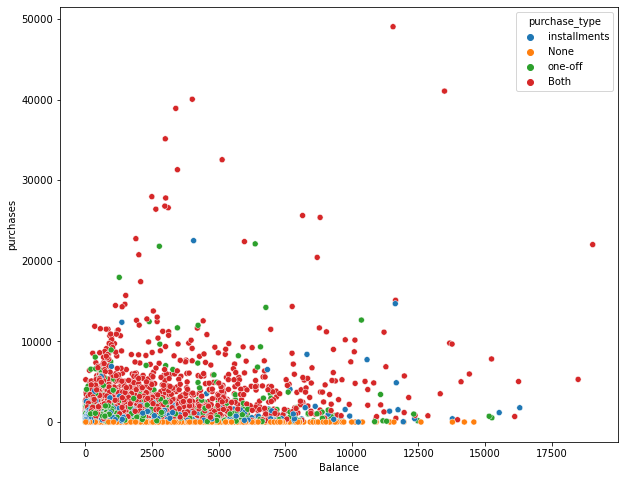

In [36]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x="BALANCE", y="PURCHASES", hue="purchase_type")
plt.xlabel('Balance');
plt.ylabel('purchases');

#### From above we can say that most of the pruchases are 'one-off'

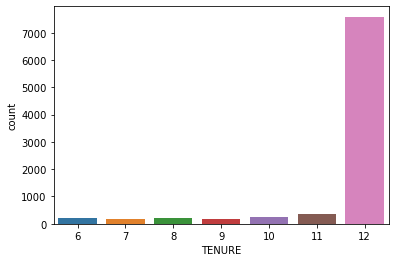

In [37]:
sns.countplot(data.TENURE);

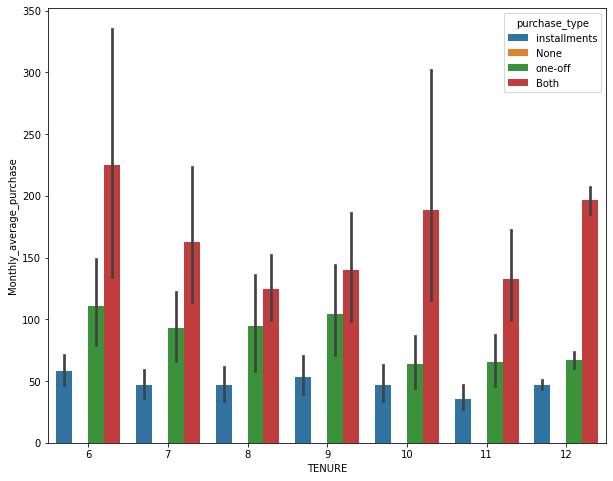

In [38]:
plt.figure(figsize=(10,8))
sns.barplot(data=data, x="TENURE", y="Monthly_average_purchase",hue = 'purchase_type');

#### From above graph we can say that most of the persons doing the both installment & one-off purchase & less persons are go for the installment purchase.

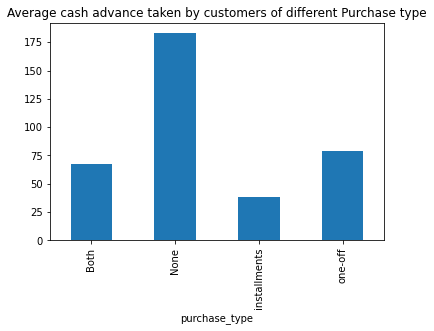

In [39]:
data.groupby('purchase_type').apply(lambda x: np.mean(x['cash_advance_amount'])).plot.bar();

plt.title('Average cash advance taken by customers of different Purchase type');

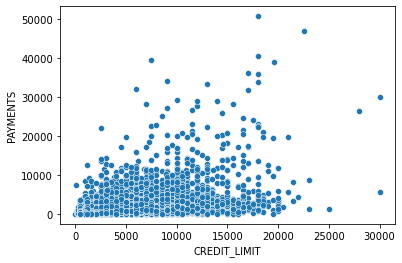

In [40]:
sns.scatterplot(x=data["CREDIT_LIMIT"],y=data["PAYMENTS"]);

In [41]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True);

In [42]:
gc.collect()

34024

In [43]:
# Handling the Categorical Data

In [44]:
df_cat = data.select_dtypes('object')

In [45]:
df_cat.columns

Index(['purchase_type'], dtype='object')

In [46]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,normalize

In [47]:
le = LabelEncoder()
data['purchase_type']=le.fit_transform(data.purchase_type)

In [48]:
le.classes_

array(['Both', 'None', 'installments', 'one-off'], dtype=object)

In [49]:
data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  ...  CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  \
0                0.000000  ...        1000.0   201.802084        139.509787   
1                0.250000  ...        7000.0  4103.032597       1072.340217   
2                0.000000  ...        7500.0   622.066742        627.284787   
3                0.083333  ...        7500.0     0.000000          0.000000   
4                0.000000  ...        1200.0   678.334763        244.791237   

   PRC_FULL_PAYMENT  TENURE  Monthly_average_purchase  cash_advance_amount  \
0          0.000000      12                  7.950000             0.000000   
1          0.222222      12                  0.000000           536.912124   
2          0.000000      12                 64.430833             0.000000   
3          0.000000      12                124.916667            17.149001   
4          0.000000      12                  1.333333             0.000000   

   purchase_type  limit_usage  pay/min_pay  
0              2     0.040901     1.446508  
1              1     0.457495     3.826241  
2              3     0.332687     0.991682  
3              3     0.222223     0.000000  
4              3     0.681429     2.771075  

[5 rows x 22 columns]

In [50]:
# Data Normalization

In [51]:
scaler = MinMaxScaler() 
data[data.columns] = scaler.fit_transform(data[data.columns]) 

In [52]:
data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  0.002148           0.818182   0.001945          0.000000   
1  0.168169           0.909091   0.000000          0.000000   
2  0.131026           1.000000   0.015766          0.018968   
3  0.087521           0.636364   0.030567          0.036775   
4  0.042940           1.000000   0.000326          0.000393   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                 0.00424      0.000000             0.166667   
1                 0.00000      0.136685             0.000000   
2                 0.00000      0.000000             1.000000   
3                 0.00000      0.004366             0.083333   
4                 0.00000      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  ...  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  \
0                0.000000  ...      0.033333  0.003979          0.001826   
1                0.166667  ...      0.233333  0.080893          0.014035   
2                0.000000  ...      0.250000  0.012264          0.008210   
3                0.055555  ...      0.250000  0.000000          0.000000   
4                0.000000  ...      0.040000  0.013374          0.003204   

   PRC_FULL_PAYMENT  TENURE  Monthly_average_purchase  cash_advance_amount  \
0          0.000000     1.0                  0.001945             0.000000   
1          0.222222     1.0                  0.000000             0.136685   
2          0.000000     1.0                  0.015766             0.000000   
3          0.000000     1.0                  0.030567             0.004366   
4          0.000000     1.0                  0.000326             0.000000   

   purchase_type  limit_usage  pay/min_pay  
0       0.666667     0.002571     0.000211  
1       0.333333     0.028755     0.000559  
2       1.000000     0.020911     0.000145  
3       1.000000     0.013968     0.000000  
4       1.000000     0.042830     0.000405  

[5 rows x 22 columns]

In [53]:
gc.collect()

0

In [54]:
from sklearn.decomposition import PCA

In [55]:
data.shape

(8950, 22)

In [56]:
data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
Monthly_average_purchase            0
cash_advance_amount                 0
purchase_type                       0
limit_usage                         1
pay/min_pay                         0
dtype: int64

In [57]:
data['limit_usage'].fillna(0,inplace=True)

In [58]:
var_ratio = {}
for  i in range(2,22):
    pca = PCA(n_components = i)
    df_pca = pca.fit(data)
    var_ratio[i] = sum(df_pca.explained_variance_ratio_)

In [59]:
var_ratio

{2: 0.5943582791586859,
 3: 0.7086206713105055,
 4: 0.8062878913754342,
 5: 0.8689887780726891,
 6: 0.926058680640039,
 7: 0.9551751946001337,
 8: 0.9703852454260097,
 9: 0.9798863956910121,
 10: 0.9854659101807528,
 11: 0.990463791618813,
 12: 0.9935758604415539,
 13: 0.9953789134323677,
 14: 0.996462428538838,
 15: 0.9974859071167271,
 16: 0.9984187979397232,
 17: 0.9992728078823109,
 18: 0.9996369019712589,
 19: 0.9999459849160676,
 20: 0.9999896970961601,
 21: 0.9999999744213612}

In [60]:
# from above output 6 components giving the greater than 90% variance ratio, Hence n_components = 6

In [61]:
pca = PCA(n_components = 6)
df_pca = pca.fit_transform(data)

In [62]:
df_pca.shape

(8950, 6)

In [63]:
pc_df = pd.DataFrame(df_pca) 
pc_df.columns = ['P1', 'P2','P3','P4','P5','P6'] 
pc_df.head(4)

P1        P2        P3        P4        P5        P6
0 -0.526425  0.061188 -0.094427 -0.060926 -0.072864  0.101752
1 -0.539443 -0.284750 -0.036165  0.201628 -0.191588 -0.097068
2  0.117733  0.433241  0.965672 -0.430280  0.102859  0.120548
3 -0.731507  0.311239  0.048312 -0.100654 -0.024749  0.204918

In [64]:
gc.collect()

0

In [65]:
from sklearn.preprocessing import Normalizer

df = Normalizer().fit_transform(pc_df.values)

In [66]:
data_new = pd.DataFrame(df)

In [67]:
data_new.head()

0         1         2         3         4         5
0 -0.946773  0.110046 -0.169826 -0.109575 -0.131046  0.183001
1 -0.795217 -0.419763 -0.053312  0.297229 -0.282428 -0.143093
2  0.101542  0.373659  0.832868 -0.371106  0.088713  0.103969
3 -0.882525  0.375493  0.058286 -0.121434 -0.029858  0.247223
4 -0.869351  0.338755  0.090589 -0.280436 -0.197469 -0.060246

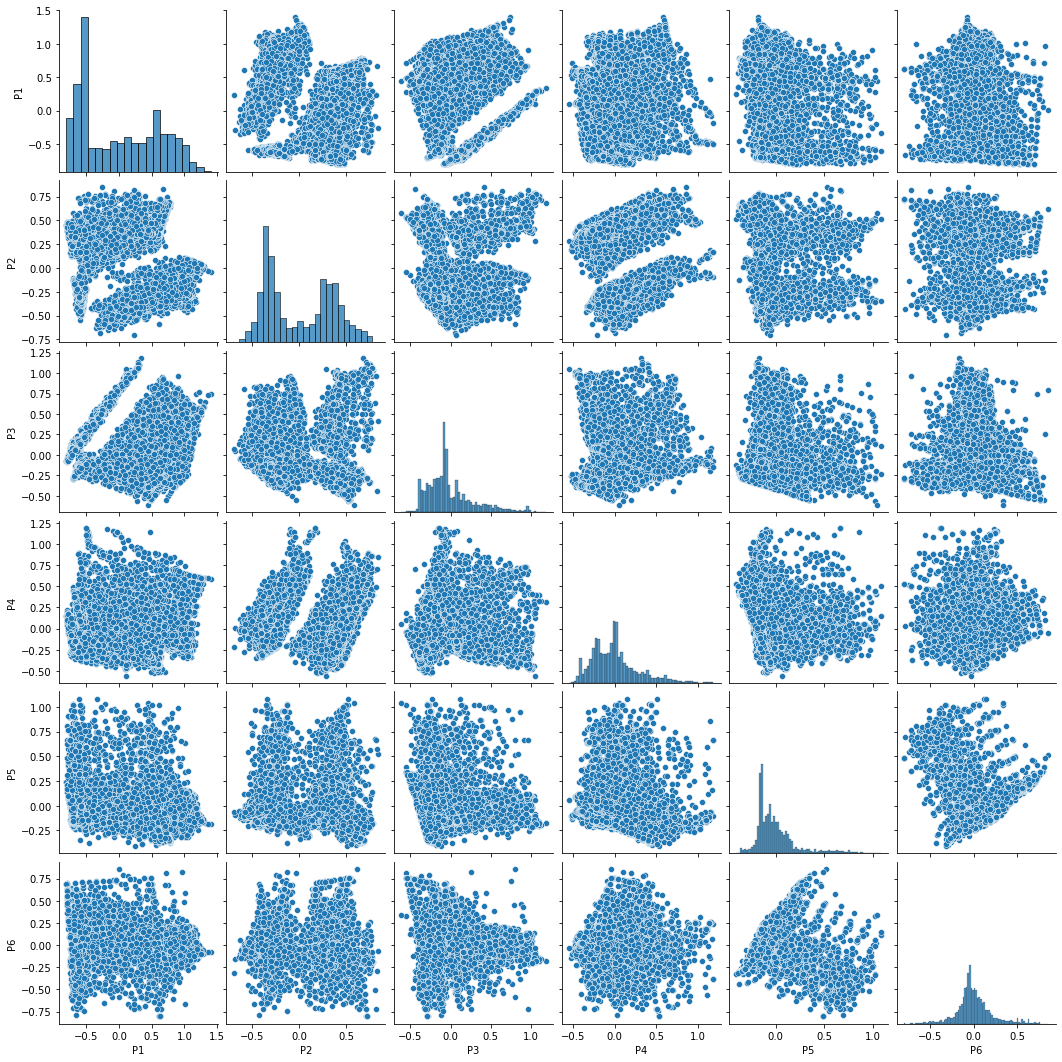

In [68]:
sns.pairplot(pd.DataFrame(pc_df));

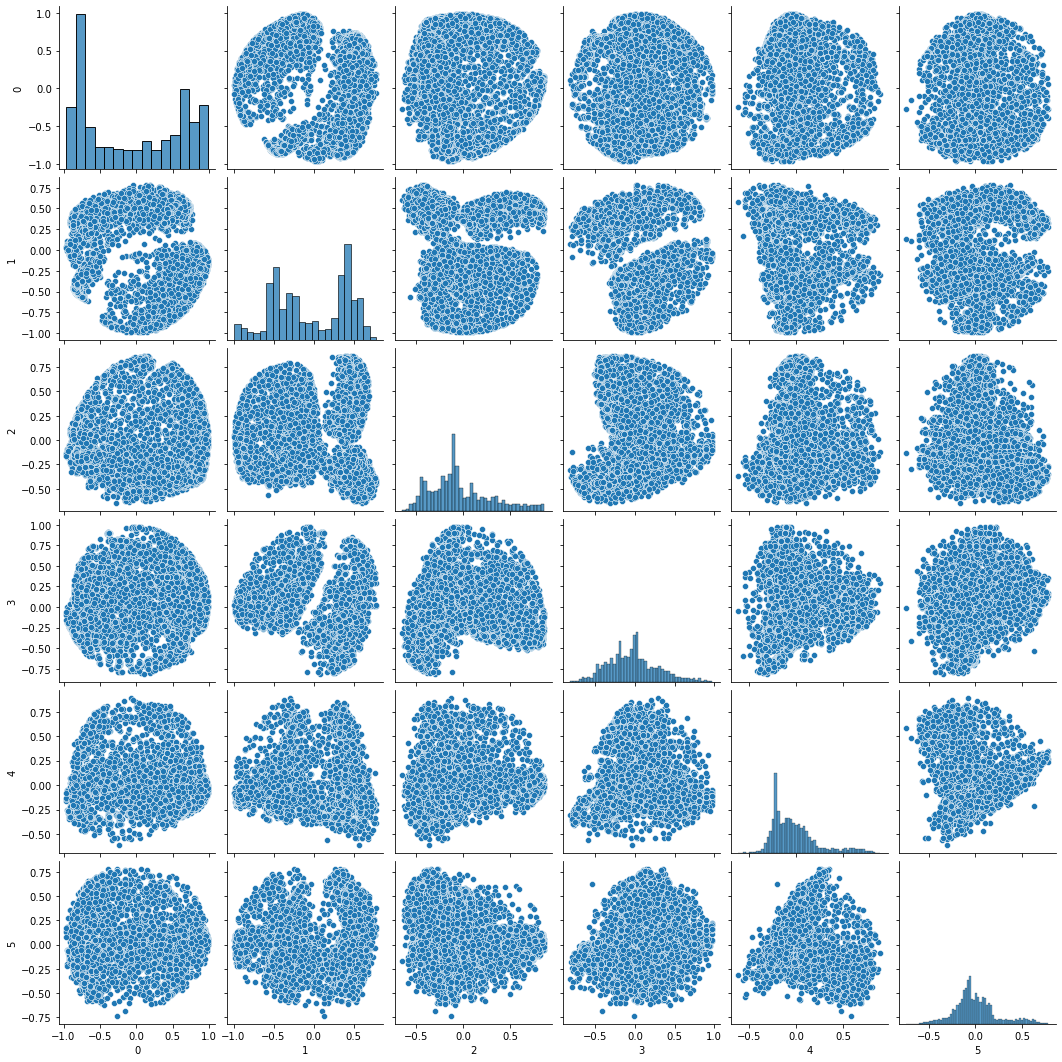

In [69]:
sns.pairplot(pd.DataFrame(data_new));

### KMean Clustering

In [70]:
gc.collect()

124580

In [71]:
from sklearn.cluster import KMeans

In [72]:
sum_of_sq_error = []
k_rng = range(2,10)
for k in k_rng:
    km = KMeans(n_clusters = k).fit(data_new)
    sum_of_sq_error.append(km.inertia_)

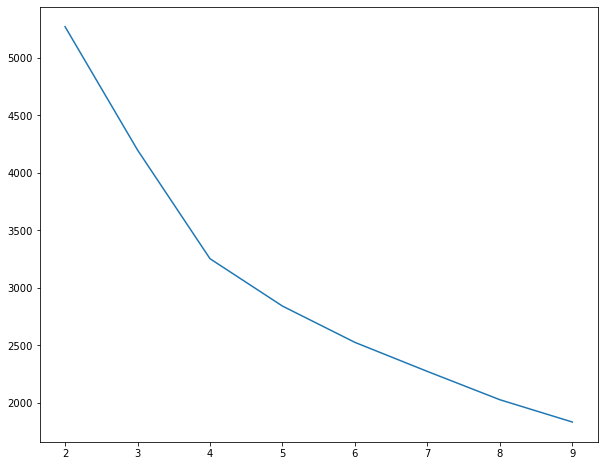

In [73]:
plt.figure(figsize=(10,8));
plt.plot(k_rng,sum_of_sq_error);

In [74]:
from sklearn.metrics import silhouette_score

In [75]:
silhouette_scores = []
for n in range(2, 10):
    silhouette_scores.append( 
        silhouette_score(pc_df, KMeans(n_clusters = n).fit_predict(data_new))) 

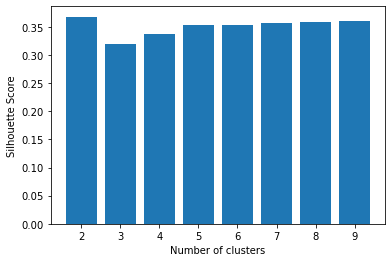

In [76]:
k = range(2, 10)
plt.bar(k, silhouette_scores) ;
plt.xlabel('Number of clusters') ;
plt.ylabel('Silhouette Score') ;

In [77]:
max(silhouette_scores)# n_clusters = 2

0.36793743856896394

In [78]:
from yellowbrick.cluster import kelbow_visualizer

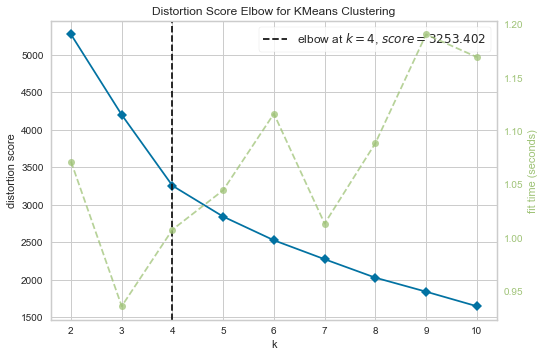

The best number of cluster is:  4


In [79]:
elbow = kelbow_visualizer(KMeans(), data_new)
kmeans = KMeans(n_clusters=elbow.elbow_value_, max_iter=1000)
label_pred = kmeans.fit_predict(data_new)
print("The best number of cluster is: ", elbow.elbow_value_)

In [80]:
km=KMeans(n_clusters=4,random_state = 42)
y_pred_4=km.fit_predict(data_new)
y_pred_4

array([3, 0, 3, ..., 2, 0, 3])

In [81]:
km.labels_

array([3, 0, 3, ..., 2, 0, 3])

In [82]:
pd.DataFrame(y_pred_4).value_counts()

1    2497
3    2405
0    2387
2    1661
dtype: int64

In [83]:
len(label_pred)

8950

In [84]:
pc_df.shape

(8950, 6)

In [85]:
df_1 = data_new.copy()

In [86]:
df_1['Cluster'] = y_pred_4

In [87]:
df_1.head()

0         1         2         3         4         5  Cluster
0 -0.946773  0.110046 -0.169826 -0.109575 -0.131046  0.183001        3
1 -0.795217 -0.419763 -0.053312  0.297229 -0.282428 -0.143093        0
2  0.101542  0.373659  0.832868 -0.371106  0.088713  0.103969        3
3 -0.882525  0.375493  0.058286 -0.121434 -0.029858  0.247223        3
4 -0.869351  0.338755  0.090589 -0.280436 -0.197469 -0.060246        3

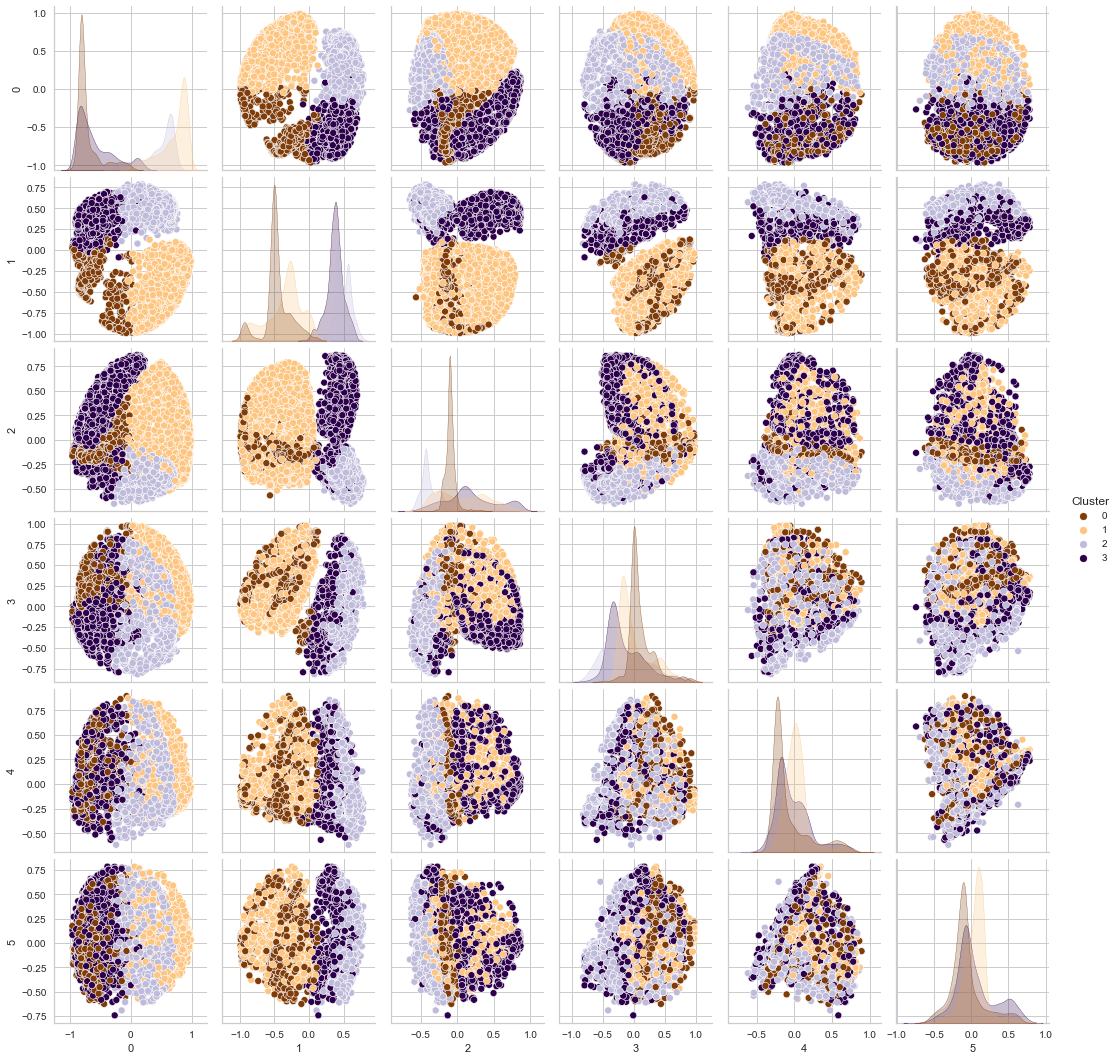

In [88]:
sns.pairplot(df_1,hue="Cluster",palette = 'PuOr');

In [89]:
gc.collect()

123840

In [90]:
# by silhouette_scores n_clusters = 2

In [91]:
km2=KMeans(n_clusters=2,random_state = 42)
y_pred_2=km2.fit_predict(data_new)
y_pred_2

array([0, 0, 1, ..., 1, 0, 0])

In [92]:
df_2 = data_new.copy()

In [93]:
df_2['Cluster'] = y_pred_2

In [94]:
df_2.head()

0         1         2         3         4         5  Cluster
0 -0.946773  0.110046 -0.169826 -0.109575 -0.131046  0.183001        0
1 -0.795217 -0.419763 -0.053312  0.297229 -0.282428 -0.143093        0
2  0.101542  0.373659  0.832868 -0.371106  0.088713  0.103969        1
3 -0.882525  0.375493  0.058286 -0.121434 -0.029858  0.247223        0
4 -0.869351  0.338755  0.090589 -0.280436 -0.197469 -0.060246        0

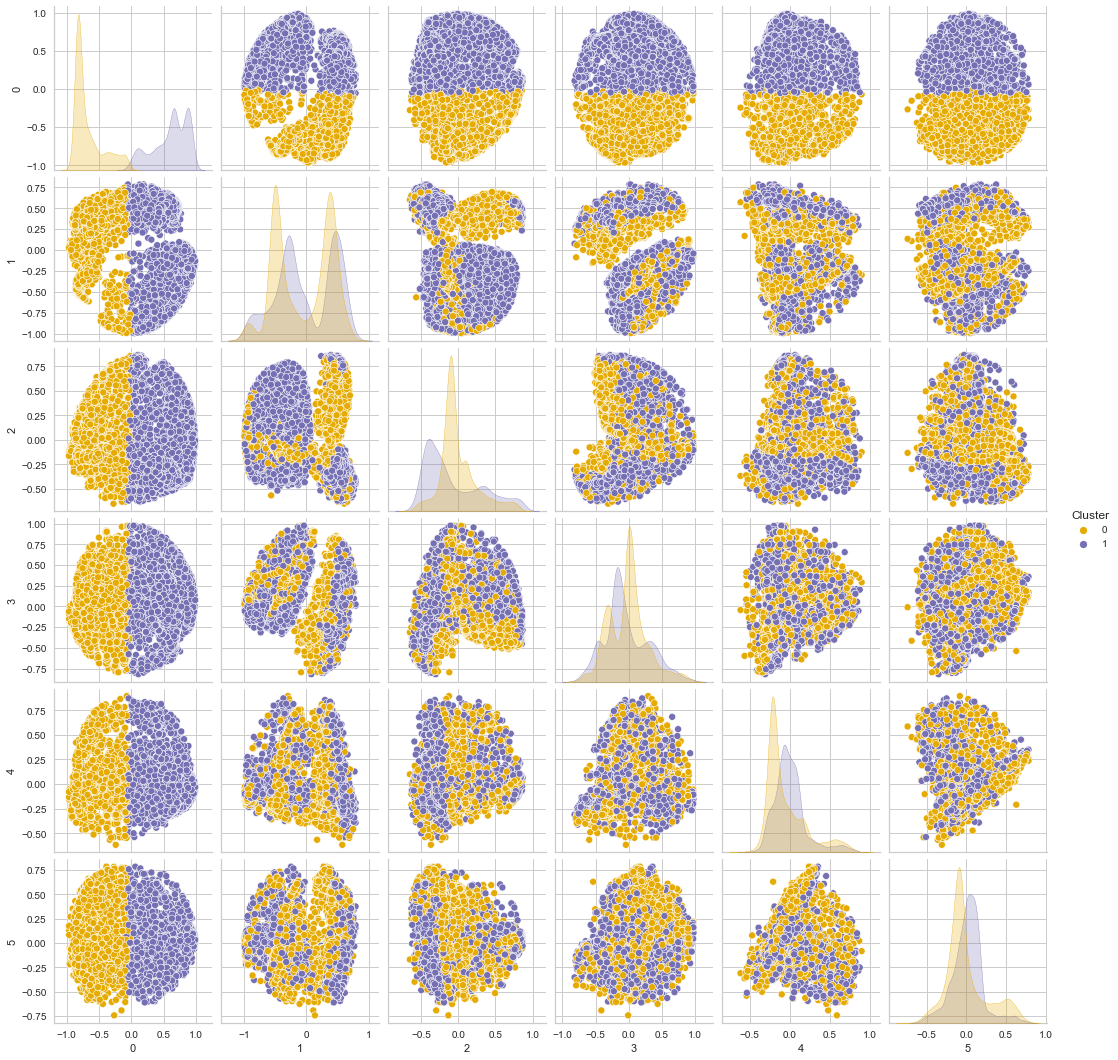

In [95]:
sns.pairplot(df_2,hue="Cluster",palette = 'Dark2_r');

In [96]:
data_cl = data.copy()

In [97]:
data_cl['Cluster'] = y_pred_4

In [98]:
data_cl.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  0.002148           0.818182   0.001945          0.000000   
1  0.168169           0.909091   0.000000          0.000000   
2  0.131026           1.000000   0.015766          0.018968   
3  0.087521           0.636364   0.030567          0.036775   
4  0.042940           1.000000   0.000326          0.000393   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                 0.00424      0.000000             0.166667   
1                 0.00000      0.136685             0.000000   
2                 0.00000      0.000000             1.000000   
3                 0.00000      0.004366             0.083333   
4                 0.00000      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  ...  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
0                0.000000  ...  0.003979          0.001826          0.000000   
1                0.166667  ...  0.080893          0.014035          0.222222   
2                0.000000  ...  0.012264          0.008210          0.000000   
3                0.055555  ...  0.000000          0.000000          0.000000   
4                0.000000  ...  0.013374          0.003204          0.000000   

   TENURE  Monthly_average_purchase  cash_advance_amount  purchase_type  \
0     1.0                  0.001945             0.000000       0.666667   
1     1.0                  0.000000             0.136685       0.333333   
2     1.0                  0.015766             0.000000       1.000000   
3     1.0                  0.030567             0.004366       1.000000   
4     1.0                  0.000326             0.000000       1.000000   

   limit_usage  pay/min_pay  Cluster  
0     0.002571     0.000211        3  
1     0.028755     0.000559        0  
2     0.020911     0.000145        3  
3     0.013968     0.000000        3  
4     0.042830     0.000405        3  

[5 rows x 23 columns]

In [99]:
data_cl.Cluster.unique()

array([3, 0, 2, 1])

In [100]:
data_cl.describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  8950.000000        8950.000000  8950.000000       8950.000000   
mean      0.082154           0.877271     0.020457          0.014534   
std       0.109306           0.236904     0.043570          0.040722   
min       0.000000           0.000000     0.000000          0.000000   
25%       0.006736           0.888889     0.000808          0.000000   
50%       0.045864           1.000000     0.007367          0.000932   
75%       0.107868           1.000000     0.022637          0.014166   
max       1.000000           1.000000     1.000000          1.000000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean                 0.018270      0.020766             0.490351   
std                  0.040193      0.044491             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                  0.003956      0.000000             0.500000   
75%                  0.020828      0.023629             0.916667   
max                  1.000000      1.000000             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  ...     PAYMENTS  MINIMUM_PAYMENTS  \
count             8950.000000  ...  8950.000000       8950.000000   
mean                 0.090096  ...     0.034170          0.010915   
std                  0.133414  ...     0.057078          0.030573   
min                  0.000000  ...     0.000000          0.000000   
25%                  0.000000  ...     0.007556          0.002134   
50%                  0.000000  ...     0.016894          0.003791   
75%                  0.148148  ...     0.037482          0.010323   
max                  1.000000  ...     1.000000          1.000000   

       PRC_FULL_PAYMENT       TENURE  Monthly_average_purchase  \
count       8950.000000  8950.000000               8950.000000   
mean           0.153715     0.919553                  0.021087   
std            0.292499     0.223055                  0.044171   
min            0.000000     0.000000                  0.000000   
25%            0.000000     1.000000                  0.000832   
50%            0.000000     1.000000                  0.007815   
75%            0.142857     1.000000                  0.023792   
max            1.000000     1.000000                  1.000000   

       cash_advance_amount  purchase_type  limit_usage  pay/min_pay  \
count          8950.000000    8950.000000  8950.000000  8950.000000   
mean              0.022652       0.453780     0.024443     0.001319   
std               0.049168       0.375585     0.024496     0.017276   
min               0.000000       0.000000     0.000000     0.000000   
25%               0.000000       0.000000     0.002608     0.000132   
50%               0.000000       0.333333     0.019027     0.000294   
75%               0.025225       0.666667     0.045102     0.000881   
max               1.000000       1.000000     1.000000     1.000000   

           Cluster  
count  8950.000000  
mean      1.456313  
std       1.148511  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       3.000000  
max       3.000000  

[8 rows x 23 columns]

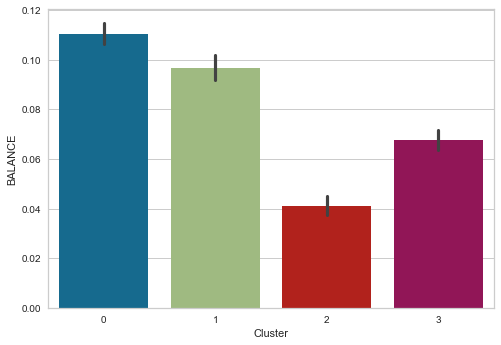

In [101]:
sns.barplot(data= data_cl, y='BALANCE',x='Cluster');

#### we can see that Monthly average balance is highest in the 0th cluster & lowest in the 2nd cluster.

In [102]:
data_cl.shape

(8950, 23)

In [103]:
xx = ['PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','limit_usage','Monthly_average_purchase']

In [104]:
cluster_d=data_cl.groupby('Cluster').apply(lambda x: x[xx].mean()).T
cluster_d

Cluster                          0         1         2         3
PURCHASES                 0.001579  0.049926  0.013443  0.013442
ONEOFF_PURCHASES          0.001194  0.036467  0.000000  0.015041
INSTALLMENTS_PURCHASES    0.001280  0.042758  0.029353  0.002053
CASH_ADVANCE              0.039452  0.016085  0.007185  0.016461
limit_usage               0.034775  0.022056  0.017171  0.021687
Monthly_average_purchase  0.001610  0.050903  0.014145  0.014256

In [105]:
len(cluster_d.columns)

4

In [106]:
cluster_d.loc['CASH_ADVANCE']


Cluster
0    0.039452
1    0.016085
2    0.007185
3    0.016461
Name: CASH_ADVANCE, dtype: float64

In [107]:
col =sns.color_palette()
col

[(0.00784313725490196, 0.4470588235294118, 0.6352941176470588),
 (0.6235294117647059, 0.7647058823529411, 0.4666666666666667),
 (0.792156862745098, 0.043137254901960784, 0.011764705882352941),
 (0.6470588235294118, 0.00784313725490196, 0.34509803921568627),
 (0.8431372549019608, 0.7803921568627451, 0.011764705882352941),
 (0.5333333333333333, 0.792156862745098, 0.8549019607843137)]

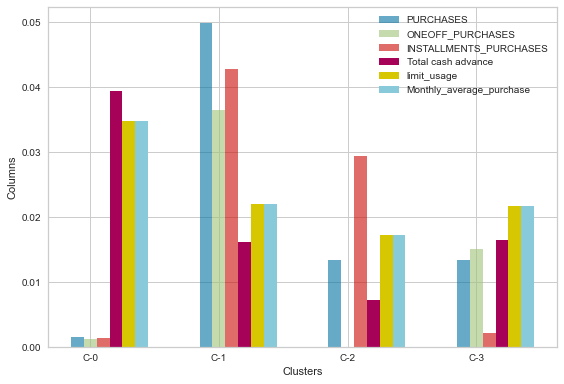

In [108]:
n= 4

cl1=cluster_d.loc['PURCHASES']
cl2=cluster_d.loc['ONEOFF_PURCHASES']
cl3=cluster_d.loc['INSTALLMENTS_PURCHASES']
cl4=cluster_d.loc['CASH_ADVANCE']
cl5=cluster_d.loc['limit_usage']
cl6=cluster_d.loc['Monthly_average_purchase']

fig, ax = plt.subplots()

index = np.arange(len(cluster_d.columns))
bar_width = 0.1

opacity = 0.6

b1 =ax.bar(index,cl1,bar_width, color=col[0],label='PURCHASES',alpha=opacity)
b2= ax.bar(index + bar_width, cl2, bar_width,color=col[1],label='ONEOFF_PURCHASES',alpha=opacity)
b3= ax.bar(index + 2*bar_width, cl3, bar_width,color=col[2],label='INSTALLMENTS_PURCHASES',alpha=opacity)
b4 = ax.bar(index + 3*bar_width, cl4, bar_width,label='Total cash advance',color=col[3])
b5 = ax.bar(index + 4*bar_width, cl5, bar_width,label='limit_usage',color=col[4])
b6 = ax.bar(index + 5*bar_width, cl5, bar_width,label='Monthly_average_purchase',color=col[5])

plt.xlabel('Clusters')
plt.ylabel('Columns')
plt.xticks(index + bar_width, ('C-0', 'C-1', 'C-2', 'C-3'))

plt.tight_layout()
plt.legend();


***Insights with 4 Clusters***



- Cluster 0 is the group of customers having very low Total purchase amount spent during last 12 months, having lowest total amount of one-off purchases & total amount of installment purchases & having highest total cash-advance amount, having highest limit usage(balance to credit limit ratio).Also having highest Monthly_average_purchase.


- Cluster 1 is the group of customers having highest Total purchase amount spent during last 12 months & highest total amount of installment purchases and highest one-off purchase.


- Cluster 2 customers are doing very less or no One_Off transactions and lowest  total cash-advance amount, having highest limit usage(balance to credit limit ratio) & lowest Monthly_average_purchase.


- Cluster 3 customers is the group of customer having low total amount of installment purchases& 2nd highest one-off purchase amount.


### #####

we can provide less interest rate on purchase transaction to **group 0**,because they are taking the highest cash on advance & having poor one-off & installment transiction.
       
**Group 1** is performing best among all. we can give some rewards or some more offers, so they can purchase more. 
  
we can give some cash on advanceto the **group 2**, because they having the lowest total cash-advance amount
    
       

In [109]:
import pandas_profiling as pp

In [110]:
profile = pp.ProfileReport(data_cl)

In [111]:
profile

In [112]:
profile.to_file("output.html")